# Julia 入門

- 2022/02/18 
- Y Kanai


このスライドは社内勉強会用に作成しています。

# Julia

- ライセンスを気にすることなく使えるオーブンソースな言語
- Cのように高速に計算でき、Rubyのように書きやすい言語
- Lispのように同図像性のある言語
- Matlabのような数式表現を使える
- Pythonのように使い勝手が良く、Rのように統計処理しやすい

そんな言語を目指して作られた言語



# Juliaを何故使うのか?

- 数式表現がそのまま使える
- ギリシャ文字などが使える
- 高速な計算処理

# Hello world

実行環境はJupyter Notebookを前提としています。

## 基本文法

### コメント

In [1]:
# コメント <= "#" を先頭に記述するとコメントになる

#=

multi-line コメントにする場合は
"#=" と "=#" で囲む

=#

### 変数

In [2]:
x=1
typeof(x)

Int64

In [3]:
head="age"
typeof(head)

String

In [4]:
y = x+1
println(y)
println("$head ; 25")

2
age ; 25


### Unicode文字の入力

科学計算や統計で扱う数式を実装するとき次のようにしたい場合がでてくる

- パラメタとして出てくるギリシャ文字を扱いたり
- indexとして下付き文字を使いたい
- ∫や ∇ を使いたい

これらは バックスラッシュ の後にキーワードを入力してタブキーをタイプすることで、Unicode文字を入力することができる。
キーワードは latex の数式入力の方法が参考になる。

In [5]:
# \_1 を入力してタブキーをタイプする
X₁ = [0 0]

# \prime を入力してタブキーをタイプする
f′(x) = 2*x+1

# \Sigmaを入力してタブキーをタイプする
Σ(f, s, e) = sum([f(n) for n = s:e])

out = Σ(x->x^2, 1, 10)

385

### 基本演算

ドキュメント [Mathmatics](https://docs.julialang.org/en/v1/base/math/) に載っているものが全てだけど、その中で最も基本的なものを取り出して紹介する。

In [6]:
# 加算
1+1
# 減算
10 - 3
# 乗算
3 * 4
# (右)除算
6 / 2
# べき乗
2^5
# 剰余
101 % 2

1

### データ構造

#### 辞書型

In [7]:
country_codes = Dict("JP"=>"81", "NZ"=>"64", "HK"=>"852")
display(country_codes)
display(country_codes["JP"])

Dict{String, String} with 3 entries:
  "NZ" => "64"
  "HK" => "852"
  "JP" => "81"

"81"

#### タプル

In [8]:
class_member = ("Aoki", "Kato", "Konishi", "Sometani")
display(class_member)
display(class_member[1])

("Aoki", "Kato", "Konishi", "Sometani")

"Aoki"

#### 配列

In [9]:
bow = [5, 1, 3, 4]
display(bow)
display(bow[1])
bow[1] = 7
display(bow)

4-element Vector{Int64}:
 5
 1
 3
 4

5

4-element Vector{Int64}:
 7
 1
 3
 4

#### 配列 (関数を使用)

In [10]:
display(zeros(3))
display(ones(5,1))
display(rand(1,2))
display(randn(2,1))

3-element Vector{Float64}:
 0.0
 0.0
 0.0

5×1 Matrix{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

1×2 Matrix{Float64}:
 0.420692  0.901926

2×1 Matrix{Float64}:
  1.0799297114239366
 -0.6459438702237017

#### 多次元配列

In [11]:
A = [1 2 3;
     4 5 6]
display(size(A))
display(length(A))
display(A[2, 1]) # index が 0 で始めていないことに注意!
display(A[2, :])
display(A[:, 2:3])

(2, 3)

6

4

3-element Vector{Int64}:
 4
 5
 6

2×2 Matrix{Int64}:
 2  3
 5  6

### 制御構文

#### while ループ

In [12]:
done = false

action = ()-> begin
    display("do action")
    ("next state", "reward", true, "info")
end

while !done
    _, _, done, _  = action()
end

"do action"

#### for ループ

In [13]:
for _ in 1:100 # in の代わりに = でも良い
    print(".")
end

X = [1, 2, 3]
f(𝑥) = 𝑥^2
for x ∈ X     # また ∈ を使っても良い
    display(f(x))
end

1

4

9

....................................................................................................

#### 内包表現

In [14]:
A = [i+0.1*j for i in 1:9, j in 1:9]

9×9 Matrix{Float64}:
 1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9
 2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
 3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9
 4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9
 5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
 6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
 7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9
 8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
 9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9

#### 条件分岐

In [15]:
state = "success"

if state == "loading"
    display("更新中...")
elseif state == "success"
    display("更新完了!")
elseif state == "failed"
    display("更新失敗")
else
    display("")
end

"更新完了!"

In [1]:
has_4tire = true
category = has_4tire ? "4駆" : "2駆"

"4駆"

#### 短絡評価

In [17]:
∠c = 90
triangle_type = "acute"
∠c == 90 && (triangle_type = "right")
∠c > 90 && (triangle_type = "obtuse")

display(triangle_type)

"right"

### 関数

In [18]:
function squared(x)
    return x^2
end

squared (generic function with 1 method)

In [19]:
squared(3)

9

In [20]:
y(x) = 2*x^2
display(y)
display(y(3))
A = rand(2,2)
display(A)
display(y(A))

LoadError: cannot define function y; it already has a value

In [21]:
# 無名関数

normal_gaussian = x->ℯ^(-x^2)/√(2π)
trigonometric_ratio = θ -> begin
    s = sin(θ)
    c = cos(θ)
    s, c
end

#11 (generic function with 1 method)

#### ブロードキャスト

ある演算を複数の要素に対して一括に処理するときに便利な機能。
演算に $.$ を付けるだけ！

In [22]:
regression_line(x) = fma(3,x,1) # fma(a, b, c) = a*b+c
regression_line(2)

7

In [23]:
# regression_line([2, 3, 4]) // error
regression_line.([2, 3, 4])

3-element Vector{Int64}:
  7
 10
 13

In [24]:
squared.([2, 3, 4])

3-element Vector{Int64}:
  4
  9
 16

In [25]:
map(squared, [2, 3, 4])

3-element Vector{Int64}:
  4
  9
 16

### パッケージ

https://julialang.org/packages/ からどんなパッケージがあるのかを閲覧することができる。

In [2]:
# 追加

using Pkg
Pkg.add("Statistics") # 統計処理
Pkg.add("IJulia") # Jupyter Notebook を使用できるようにする (Julia REPL で入れることになる)
Pkg.add("PyPlot") # Python のグラフ描画のライブラリ Matplotlib を Julia から利用する
Pkg.add("Plots") # Julia用のグラフ描画パッケージ
Pkg.add("Distributions") # 様々な確率分布を提供してくれる
Pkg.add("Conda")

# 利用

using Statistics
using Plots

# rise: Jupyter Notebookで作成したものをスライドにできる
using Conda
Conda.add_channel("conda-forge")
Conda.add("rise")

Solving environment: ...working... done

# All requested packages already installed.



    Updating registry at `C:\Users\yusuke.kanai\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\yusuke.kanai\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\yusuke.kanai\.julia\env

In [27]:
?mean

search: mean mean! median median! weighted_color_mean PKGMODE_MANIFEST



```
mean(itr)
```

Compute the mean of all elements in a collection.

!!! note
    If `itr` contains `NaN` or [`missing`](@ref) values, the result is also `NaN` or `missing` (`missing` takes precedence if array contains both). Use the [`skipmissing`](@ref) function to omit `missing` entries and compute the mean of non-missing values.


# Examples

```jldoctest
julia> using Statistics

julia> mean(1:20)
10.5

julia> mean([1, missing, 3])
missing

julia> mean(skipmissing([1, missing, 3]))
2.0
```

---

```
mean(f::Function, itr)
```

Apply the function `f` to each element of collection `itr` and take the mean.

```jldoctest
julia> using Statistics

julia> mean(√, [1, 2, 3])
1.3820881233139908

julia> mean([√1, √2, √3])
1.3820881233139908
```

---

```
mean(f::Function, A::AbstractArray; dims)
```

Apply the function `f` to each element of array `A` and take the mean over dimensions `dims`.

!!! compat "Julia 1.3"
    This method requires at least Julia 1.3.


```jldoctest
julia> using Statistics

julia> mean(√, [1, 2, 3])
1.3820881233139908

julia> mean([√1, √2, √3])
1.3820881233139908

julia> mean(√, [1 2 3; 4 5 6], dims=2)
2×1 Matrix{Float64}:
 1.3820881233139908
 2.2285192400943226
```

---

```
mean(A::AbstractArray; dims)
```

Compute the mean of an array over the given dimensions.

!!! compat "Julia 1.1"
    `mean` for empty arrays requires at least Julia 1.1.


# Examples

```jldoctest
julia> using Statistics

julia> A = [1 2; 3 4]
2×2 Matrix{Int64}:
 1  2
 3  4

julia> mean(A, dims=1)
1×2 Matrix{Float64}:
 2.0  3.0

julia> mean(A, dims=2)
2×1 Matrix{Float64}:
 1.5
 3.5
```

---

```
mean(A::AbstractArray, w::AbstractWeights[, dims::Int])
```

Compute the weighted mean of array `A` with weight vector `w` (of type `AbstractWeights`). If `dim` is provided, compute the weighted mean along dimension `dims`.

# Examples

```julia
n = 20
x = rand(n)
w = rand(n)
mean(x, weights(w))
```


## 実演

### 多項式近似

4次関数の多項式近似を例に紹介する。

#### データ

データは -2 ～ 3 の間で $f(x) = 0.3x^4 - 0.8x^3 - 0.6x^2 + 2.4x + 1 + \epsilon$ から生成されたとする 

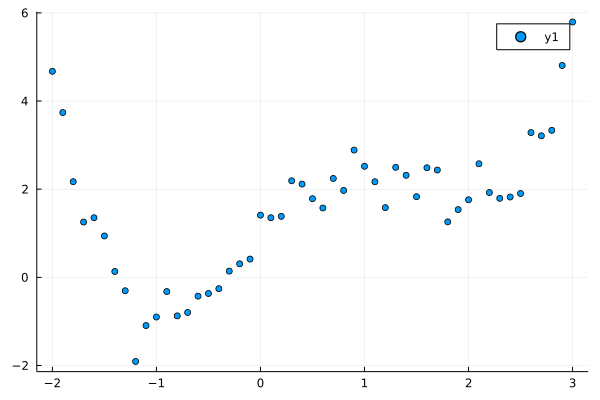

In [3]:
xs = -2:0.1:3

f(x) = 0.3x^4 - 0.8x^3 - 0.6x^2 + 2.4x + 1 + 0.4 * randn(1)[1]

ys = f.(xs)

gr() # 描画用に GR backend(https://gr-framework.org/) をロードする
scatter!(xs, ys)

#### 誤差関数

$\bf{w}$ を係数のパラメータ$[w_0, w_1, w_2, w_3, w_4]^\text{T}$, $\bf{\textit{x}}$ を $[1.0, x, x^2, x^3, x^4]^\text{T}$ として誤差関数を次のように定義する

$$
    E(\bf{w}) = \frac{1}{2N^2}\sum_n^N {(\it{y}_n-\bf{w}\bf{\textit{x}}_n)^2}
$$

In [4]:
𝒙(x) = [1.0, x, x^2, x^3, x^4]
𝐰₀= [1.3, 2.2, -0.3, -0.5, 0.1]

E(𝐰) = sum([(ys[n] - 𝐰'*𝒙(xs[n]))^2.0 for n in 1:length(xs)])  / (2*length(xs)^2)

E (generic function with 1 method)

#### 勾配降下法

勾配降下法によればパラメータは次の計算で更新される

$$
\bf{w}^{(\tau+1)} = \bf{w}^{(\tau)} - \eta\nabla E(\bf{w})
$$

In [5]:
using ForwardDiff

function gradient_method(E, 𝐰ᵢ, η, maxiter)
    # 勾配
    ∇E(𝐰) = ForwardDiff.gradient(E, 𝐰)
    for _ in 2:maxiter
        𝐰ᵢ = 𝐰ᵢ - η*∇E(𝐰ᵢ)
    end
    𝐰ᵢ
end     

gradient_method (generic function with 1 method)

#### 学習結果

パラメータを更新した結果と、その結果を使ったグラフをみてみる

In [6]:
𝐰_out = gradient_method(E, 𝐰₀, 0.1, 10000)

5-element Vector{Float64}:
  1.0022227417703529
  2.414540842683503
 -0.6140220621844716
 -0.7999226655103442
  0.3006316082204862

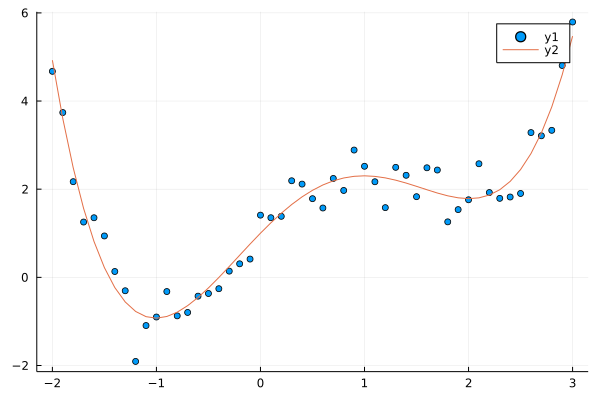

In [7]:
g(x) = 𝐰_out'*𝒙(x)

plot!(xs, g.(xs))

# 復習

- [JuliaAcademy](https://juliaacademy.com/) みると良い

# 参考文献

- [Why we created Julia. ](https://julialang.org/blog/2012/02/why-we-created-julia/)
- [Why We Use Julia, 10 Years Later](https://julialang.org/blog/2022/02/10years/)
- Juliaで作って学ぶベイズ統計学
- [JuliaAcademy](https://juliaacademy.com/)
- バターン認識と機械学習(上)